In [1]:
import numpy as np
import matplotlib.pyplot as plt

from modules.game import play
from modules.node import CongklakNode
from modules.state import CongklakState
from modules.strategies import (
    simple_strategy,
    random_strategy,
    maximize_house_strategy
)


%load_ext autoreload
%autoreload 2

# Run

In [2]:
player = 1
print_every = 100_000

np.random.seed(0)
initial_state = CongklakState(player=player, holes=7, init_beads=7)

total_states, final_node, node_list = play(
    player=player,
    policy=maximize_house_strategy,
    initial_state=initial_state,
    print_every=print_every
)

cur_node = final_node
path = [cur_node]
while cur_node.parent != cur_node.node_id:
    cur_node = node_list[cur_node.parent]
    path.append(cur_node)

print('Path to final state:')
path = list(reversed(path))
for i, node in enumerate(path):
    if i > 0:
        print(f'Choose action: {node.action}, result:')
    print(f'\n> Now turn of', node.state)
print('Finish')

[RESULT]
> Total observed states: 76
> Final state:
Player: 0, board:
[[57  0  0  0  0  0  0  0]
 [40  0  0  0  0  1  0  0]]
> Winner: player 0 with 57 beads!!
> Total steps to win: 75
Path to final state:

> Now turn of Player: 1, board:
[[0 7 7 7 7 7 7 7]
 [0 7 7 7 7 7 7 7]]
Choose action: 7, result:

> Now turn of Player: 0, board:
[[0 8 8 8 8 8 8 8]
 [0 7 7 7 7 7 7 0]]
Choose action: 7, result:

> Now turn of Player: 0, board:
[[1 8 8 8 8 8 8 0]
 [0 8 8 8 8 8 8 1]]
Choose action: 6, result:

> Now turn of Player: 0, board:
[[ 4  1 10 10 10  0  2  3]
 [ 0 11 11  1 11 11 11  2]]
Choose action: 7, result:

> Now turn of Player: 1, board:
[[ 4  1 10 10 10  0  2  0]
 [ 0 12 12  0 12 12 11  2]]
Choose action: 7, result:

> Now turn of Player: 0, board:
[[ 4  3  1 12 12  0  4  2]
 [ 5 14 14  0 14  0 12  1]]
Choose action: 7, result:

> Now turn of Player: 1, board:
[[ 8  4  0 13 13  1  5  1]
 [ 5 16  0  1 15  1 13  2]]
Choose action: 7, result:

> Now turn of Player: 0, board:
[[ 8  5  1 

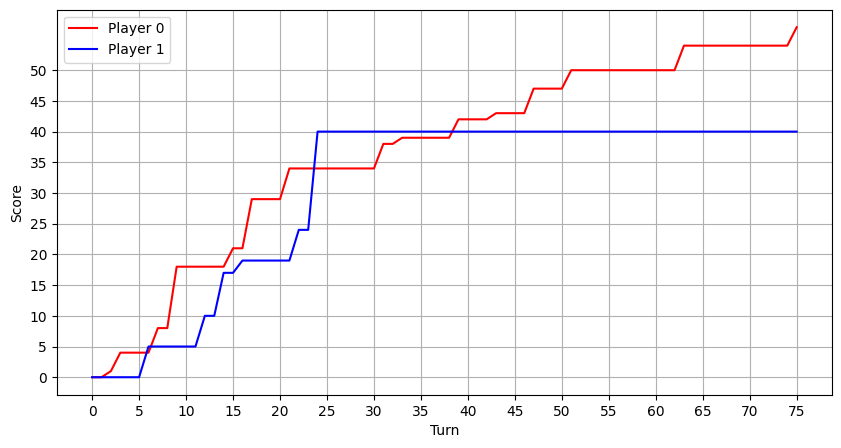

In [3]:
player_score_list = []
for node in path:
    state = node.state
    player_score_list.append((state.player, state.board[state.player, 0]))

score_turn_list = np.zeros((len(player_score_list), 2), dtype=np.int32)
for i, (player, score) in enumerate(player_score_list):
    score_turn_list[i, player] = score
    score_turn_list[i, 1 - player] = score_turn_list[i - 1, 1 - player]

plt.figure(figsize=(10, 5))
plt.plot(score_turn_list[:, 0], label='Player 0', color='red')
plt.plot(score_turn_list[:, 1], label='Player 1', color='blue')
plt.legend()
plt.xticks(np.arange(0, len(score_turn_list), 5))
plt.yticks(np.arange(0, 55, 5))
plt.xlabel('Turn')
plt.ylabel('Score')
plt.grid()
plt.gca().set_axisbelow(True)
plt.show()